In [1]:
from MultiLabelEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

## Load data and convert to Spikes

In [2]:
trainpath = '../datasets/VirusPseAAC/VirusPseAAC207_train_MVMD.mat'
testpath = '../datasets/VirusPseAAC/VirusPseAAC207_test_MVMD.mat'

train_ = loadmat(trainpath)
train_data, train_labels = train_['transformed_train_data'], train_['labels']

test_ = loadmat(testpath)
test_data, test_labels = test_['transformed_test_data'], test_['labels']

a = train_data.max(axis=0)
b = train_data.min(axis=0)

train_spikes = encoding(train_data, device, a, b)
test_spikes = encoding(test_data, device, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 83/83 [00:00<00:00, 7041.55it/s]

Train data shape:  (124, 1, 300)
Train labels shape:  (124, 6)
Test data shape:  (83, 1, 300)
Test labels shape:  (83, 6)


## MVMD SNN

  0%|          | 0/1000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 21
Class 1, class 1 neurons = 5, class 0 neurons = 33
Class 2, class 1 neurons = 9, class 0 neurons = 21
Class 3, class 1 neurons = 27, class 0 neurons = 26
Class 4, class 1 neurons = 19, class 0 neurons = 29
Class 5, class 1 neurons = 10, class 0 neurons = 24


 20%|██        | 200/1000 [24:47<1:38:42,  7.40s/it]

Epoch number: 200
Train Precision: 0.9771, Test Precision: 0.5745
Train Recall: 0.8366, Test Recall: 0.2727
Train F1: 0.9014, Test F1: 0.3699
Max. train classwise accuracy for is 1.0000
Min. train classwise accuracy for is 0.9113
Max. test classwise accuracy for is 1.0000
Min. test classwise accuracy for is 0.5783


 40%|████      | 400/1000 [49:29<1:14:02,  7.40s/it]

Epoch number: 400
Train Precision: 0.9860, Test Precision: 0.4400
Train Recall: 0.9216, Test Recall: 0.3333
Train F1: 0.9527, Test F1: 0.3793
Max. train classwise accuracy for is 1.0000
Min. train classwise accuracy for is 0.9355
Max. test classwise accuracy for is 1.0000
Min. test classwise accuracy for is 0.5663


 60%|██████    | 600/1000 [1:14:08<49:12,  7.38s/it]  

Epoch number: 600
Train Precision: 1.0000, Test Precision: 0.4699
Train Recall: 0.9739, Test Recall: 0.3939
Train F1: 0.9868, Test F1: 0.4286
Max. train classwise accuracy for is 1.0000
Min. train classwise accuracy for is 0.9677
Max. test classwise accuracy for is 1.0000
Min. test classwise accuracy for is 0.5783


 80%|████████  | 800/1000 [1:38:41<24:30,  7.35s/it]

Epoch number: 800
Train Precision: 0.9935, Test Precision: 0.4205
Train Recall: 0.9935, Test Recall: 0.3737
Train F1: 0.9935, Test F1: 0.3957
Max. train classwise accuracy for is 1.0000
Min. train classwise accuracy for is 0.9839
Max. test classwise accuracy for is 1.0000
Min. test classwise accuracy for is 0.5060


100%|██████████| 1000/1000 [2:03:11<00:00,  7.39s/it]

Epoch number: 1000
Train Precision: 0.9935, Test Precision: 0.4253
Train Recall: 1.0000, Test Recall: 0.3737
Train F1: 0.9967, Test F1: 0.3978
Max. train classwise accuracy for is 1.0000
Min. train classwise accuracy for is 0.9919
Max. test classwise accuracy for is 1.0000
Min. test classwise accuracy for is 0.4940
Max. Test Precision: 0.8421 at epoch 59
Test Recall at max. test precision: 0.1616
Test F1 at max. test precision: 0.2712
Train Precision at max. test precision: 0.9780
Train Recall at max. test precision: 0.5817
Train F1 at max. test precision: 0.7295
Max. Test Recall: 0.4141 at epoch 612
Test Precision at max. test recall: 0.4767
Test F1 at max. test recall: 0.4432
Train Recall at max. test recall: 0.9804
Train Precision at max. test recall: 1.0000
Train F1 at max. test recall: 0.9901
Max. Test F1: 0.4432 at epoch 612
Test Recall at max. test F1: 0.4141
Test Precision at max. test F1: 0.4767
Train Recall at max. test F1: 0.9804
Train Precision at max. test F1: 1.0000
Train

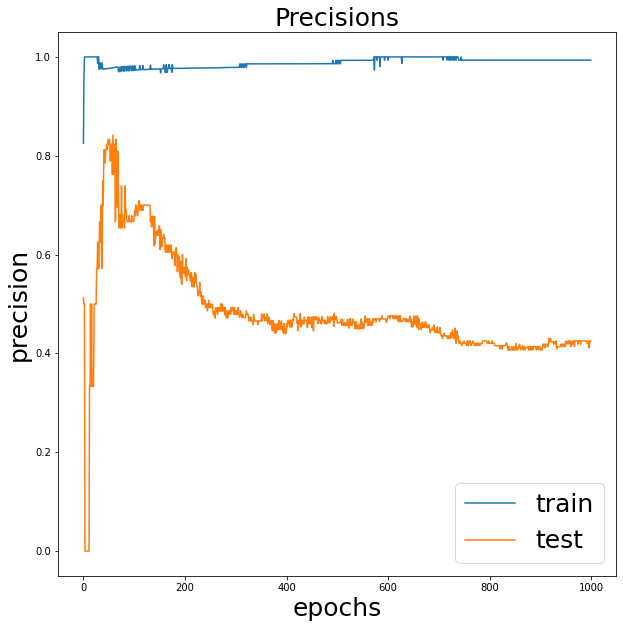

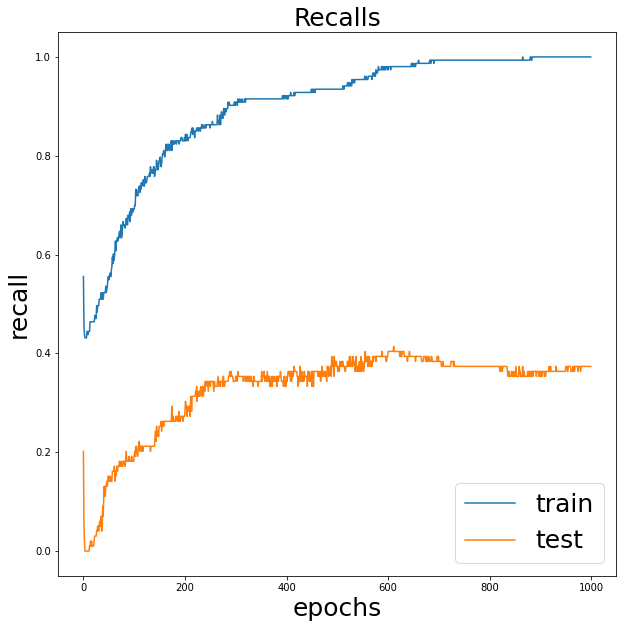

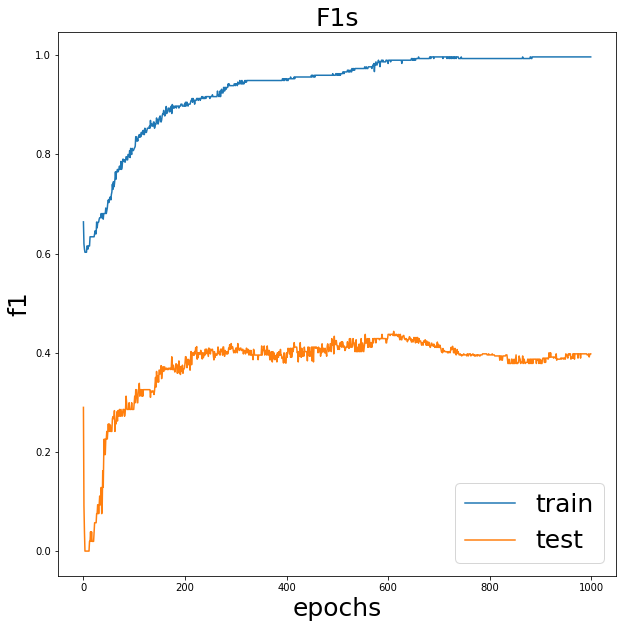

In [3]:
hparams_dict = {
    'name': 'virus',
    'inputs': 300,
    'outputs': 6,
    'time_constant': 300,
    'alpha_a': 0.38,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-3,
    'sim_time': 600,
    'n_epochs': 1000,
    'print_every': 200,
    'seed': 2,
    'ckpt_dir': './checkpoints/virus/mvmd',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
train_history, test_history = net.fit(train_spikes, train_labels, test_spikes, test_labels)

In [3]:
hparams_dict = {
    'name': 'virus',
    'inputs': 300,
    'outputs': 6,
    'time_constant': 300,
    'alpha_a': 0.38,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-3,
    'sim_time': 600,
    'n_epochs': 1000,
    'print_every': 200,
    'seed': 2,
    'ckpt_dir': './checkpoints/virus/mvmd',
    'load_from_file': './checkpoints/virus/mvmd/best_f1_model0.005_1000.pkl',
    'device': device
}
net = OverallSNN(hparams_dict)
metrics = Metrics(net, train_spikes, train_labels, test_spikes, test_labels)
metrics.evaluate()

Model was trained on 6 classes
Evaluating Model on train mode
Classwise Results
|                     |   0 |   1 |   2 |         3 |   4 |   5 |
|:--------------------|----:|----:|----:|----------:|----:|----:|
| class               |   1 |   2 |   3 | 4         |   5 |   6 |
| accuracy            |   1 |   1 |   1 | 0.975806  |   1 |   1 |
| hamming loss        |   0 |   0 |   0 | 0.0241935 |   0 |   0 |
| zero_one_loss       |   0 |   0 |   0 | 0.0241935 |   0 |   0 |
| micro av. jaccard   |   1 |   1 |   1 | 0.952756  |   1 |   1 |
| macro av. jaccard   |   1 |   1 |   1 | 0.951428  |   1 |   1 |
| micro av. precision |   1 |   1 |   1 | 0.975806  |   1 |   1 |
| macro av. precision |   1 |   1 |   1 | 0.97973   |   1 |   1 |
| micro av. recall    |   1 |   1 |   1 | 0.975806  |   1 |   1 |
| macro av. recall    |   1 |   1 |   1 | 0.971698  |   1 |   1 |
| micro av. f1        |   1 |   1 |   1 | 0.975806  |   1 |   1 |
| macro av. f1        |   1 |   1 |   1 | 0.975092  |   1 |   